In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html

In [2]:
path = 'enem_small_data/'
file = 'Microdados_ENEM_Amostra_'

In [3]:
# Copiei do stack overflow temporariamente

def display_dfs(dfs, names=[]):
    html_str = ''
    if names:
        html_str += ('<tr>' + 
                     ''.join(f'<td style="text-align:center">{name}</td>' for name in names) + 
                     '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:top"> {df.head().to_html(index=False)}</td>' 
                         for df in dfs) + 
                 '</tr>')
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    display_html(html_str, raw=True)

In [4]:
plt.ion()
plt.rcParams['figure.figsize']  = (8, 5)

In [5]:
df2018 = pd.read_csv(path+file+'2018.csv', sep=',',  encoding='latin-1', usecols=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']).dropna()

In [6]:
df2018.loc[:,'Media'] = df2018.sum(axis=1)/len(df2018.columns)

In [7]:
dfs = list([df2018[['NU_NOTA_CN']], 
            df2018[['NU_NOTA_CH']],
            df2018[['NU_NOTA_LC']], 
            df2018[['NU_NOTA_MT']], 
            df2018[['NU_NOTA_REDACAO']], 
            df2018[['Media']]])

In [8]:
display_dfs(dfs, ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Media'])

NU_NOTA_CN NU_NOTA_CH NU_NOTA_LC NU_NOTA_MT NU_NOTA_REDACAO Media 
 
 
 NU_NOTA_CN 
 
 
 
 
 417.4 
 
 
 401.1 
 
 
 628.0 
 
 
 390.9 
 
 
 427.9 
 
 
 
 
 
 NU_NOTA_CH 
 
 
 
 
 481.5 
 
 
 573.5 
 
 
 652.6 
 
 
 600.5 
 
 
 543.1 
 
 
 
 
 
 NU_NOTA_LC 
 
 
 
 
 496.5 
 
 
 466.8 
 
 
 581.7 
 
 
 598.7 
 
 
 426.1 
 
 
 
 
 
 NU_NOTA_MT 
 
 
 
 
 504.3 
 
 
 509.8 
 
 
 440.7 
 
 
 564.5 
 
 
 457.8 
 
 
 
 
 
 NU_NOTA_REDACAO 
 
 
 
 
 320.0 
 
 
 340.0 
 
 
 860.0 
 
 
 480.0 
 
 
 340.0 
 
 
 
 
 
 Media 
 
 
 
 
 443.94 
 
 
 458.24 
 
 
 632.60 
 
 
 526.92 
 
 
 438.98

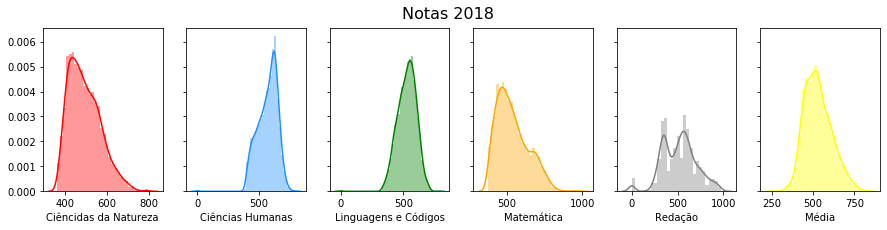

In [9]:
fig, axes = plt.subplots(1, 6, figsize=(15, 3), sharey=True)
colors = ['red', 'dodgerblue', 'green', 'orange', 'gray', 'yellow']
labels = ['Ciêncidas da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação', 'Média']
for i in range(len(dfs)):
    sns.distplot(dfs[i], color = colors[i], ax = axes[i], axlabel = labels[i])
fig.suptitle(("Notas 2018"), fontsize=16)
plt.show()

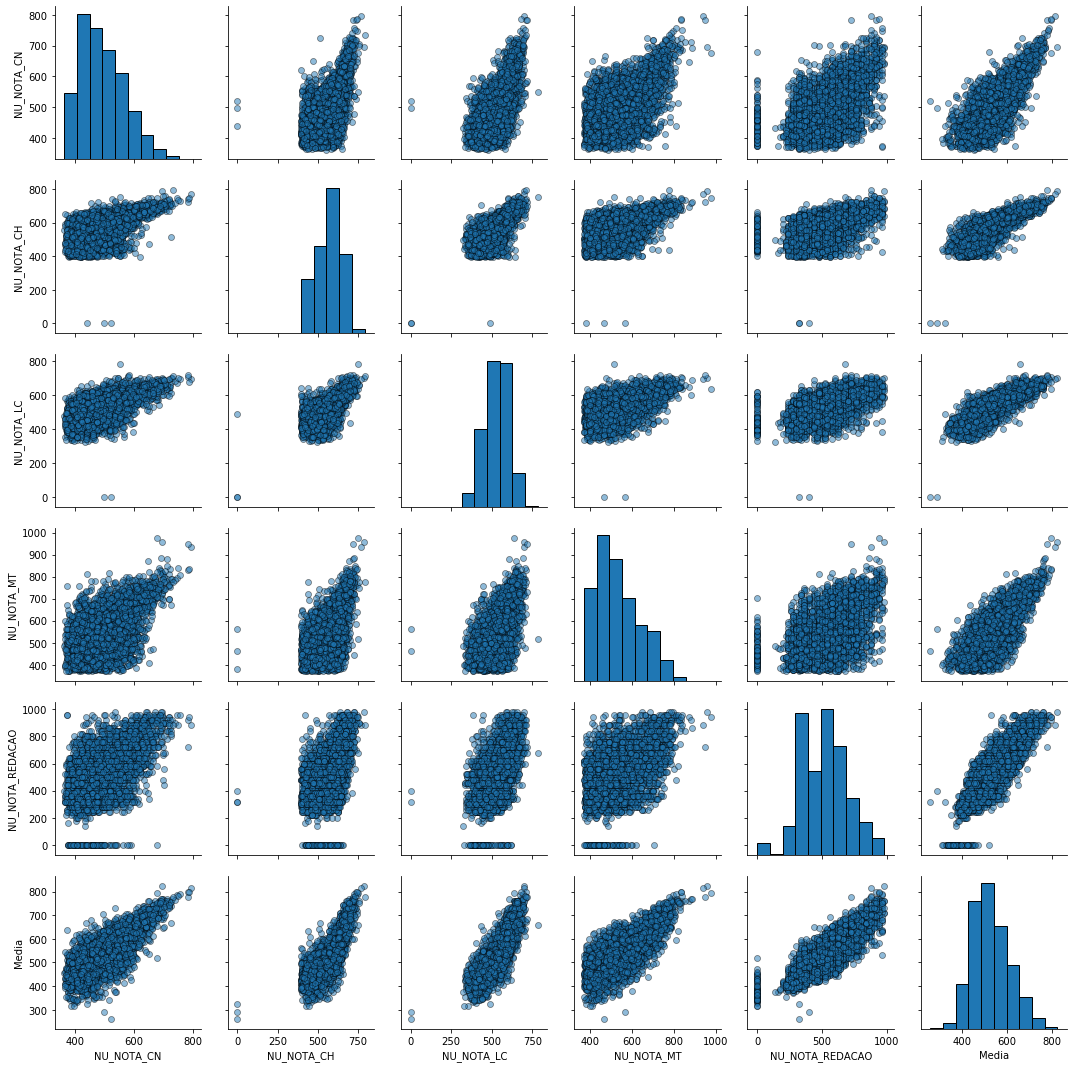

In [10]:
#sns.pairplot(df2018[['NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Media']], diag_kws={'edgecolor':'k'}, plot_kws={'alpha':0.5, 'edgecolor':'k'})
sns.pairplot(df2018, diag_kws={'edgecolor':'k'}, plot_kws={'alpha':0.5, 'edgecolor':'k'})
#Interessante ver como algumas notas influenciam mais na média que outras...

In [11]:
dfCorr = pd.read_csv(path+file+'2018.csv', sep=',',  encoding='latin-1', usecols=[
    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO'
    ,'TP_SEXO', 'TP_COR_RACA', 'Q001', 'Q002', 'Q006', 'Q025', 'TP_DEPENDENCIA_ADM_ESC']).dropna()
dfCorr.loc[:,'Media'] = dfCorr[['NU_NOTA_CN', 'NU_NOTA_CH'
                                , 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].sum(axis=1)/len(dfCorr[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].columns)
#dfCorr = dfCorr.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO'], 1)
dfCorr['Q001'] = [ord(x) - 64 for x in dfCorr['Q001']]
dfCorr['Q002'] = [ord(x) - 64 for x in dfCorr['Q002']]
dfCorr['Q006'] = [ord(x) - 64 for x in dfCorr['Q006']]
dfCorr['Q025'] = [ord(x) - 64 for x in dfCorr['Q025']]
sexo = {'M': 1, 'F': 2}
dfCorr['TP_SEXO'] = [sexo[x] for x in dfCorr['TP_SEXO']]
#dfCorr = dfCorr.drop(['Q001', 'Q002'], 1)
dfCorr.head()

,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,Media
2,2,1,2.0,417.4,481.5,496.5,504.3,320.0,4,6,8,2,443.94
7,2,3,2.0,390.9,600.5,598.7,564.5,480.0,8,2,2,1,526.92
11,2,3,2.0,521.8,602.7,532.8,486.3,440.0,5,5,3,2,516.72
13,2,3,4.0,640.8,659.4,606.0,736.9,800.0,5,5,7,2,688.62
28,2,3,2.0,475.6,432.9,507.7,420.5,300.0,3,5,3,2,427.34


In [12]:
#Precisamos pensar como será feita a correlação para dados categóricos...
#sns.pairplot(dfCorr, diag_kws={'edgecolor':'k'}, plot_kws={'alpha':0.5, 'edgecolor':'k'})

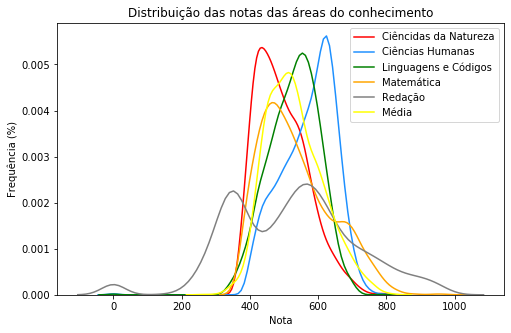

In [13]:
for i in range(len(dfs)):    
    #sns.kdeplot(dfs[i], color = colors[i], label = str(2018-i))  Começou a dar erro do nada, não soube o que é
    sns.distplot(dfs[i], color = colors[i], hist = False, label = labels[i])
plt.title('Distribuição das notas das áreas do conhecimento')
plt.xlabel('Nota')
plt.ylabel('Frequência (%)')
plt.legend()

plt.show()

In [14]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

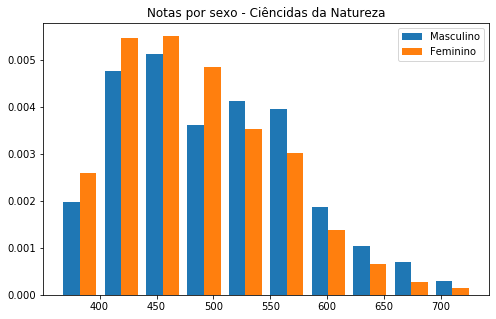

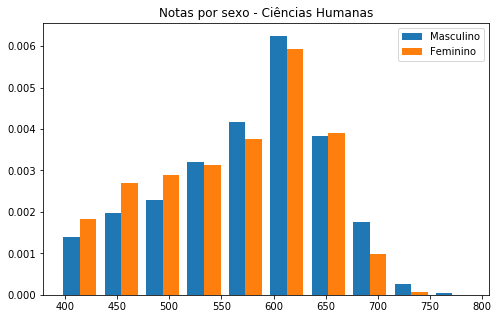

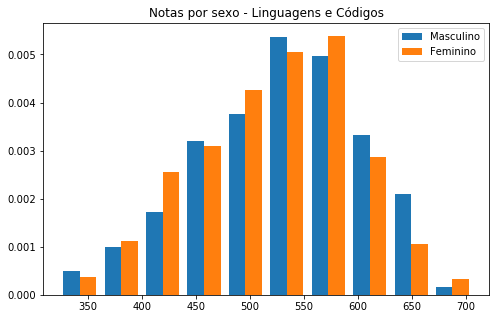

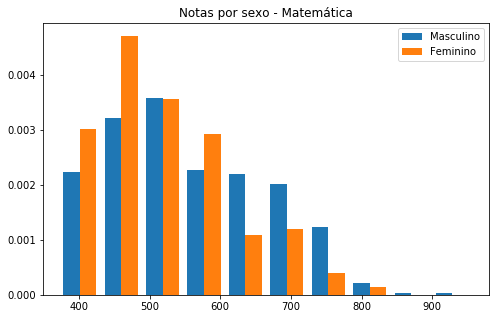

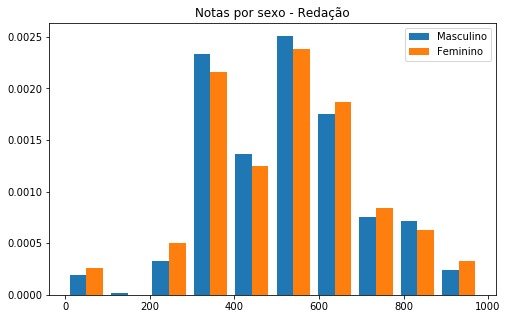

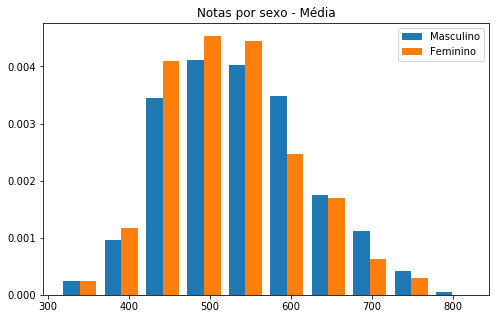

In [15]:
labels = ['Ciêncidas da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação', 'Média']
columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO', 'Media']
for i in range(len(dfs)):
    plt.hist([dfCorr[dfCorr['TP_SEXO'] == 1][columns[i]],dfCorr[dfCorr['TP_SEXO'] == 2][columns[i]]], label=['Masculino', 'Feminino'], density=True)
    plt.legend(loc='upper right')
    plt.title('Notas por sexo - '+labels[i])
    plt.show()
    


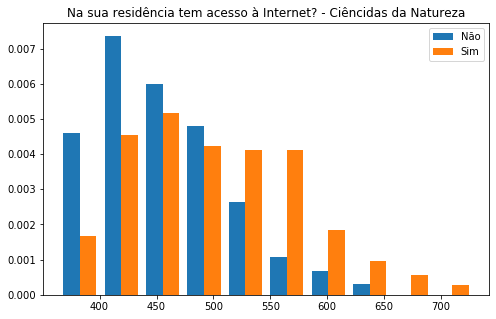

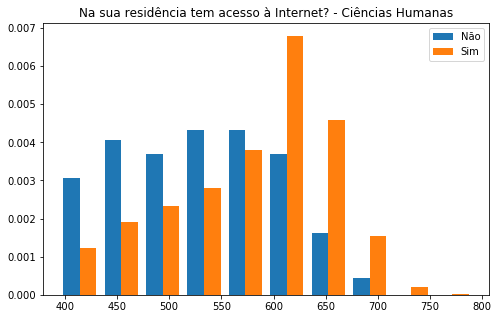

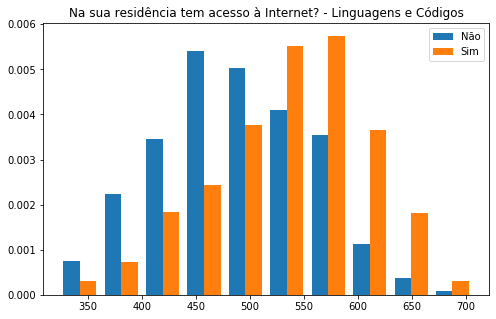

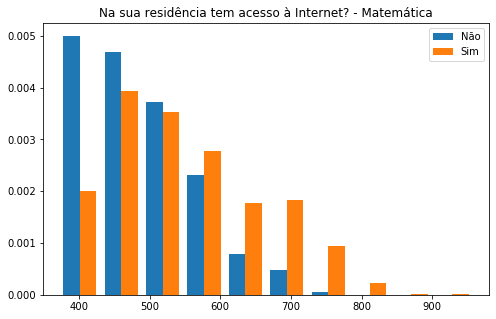

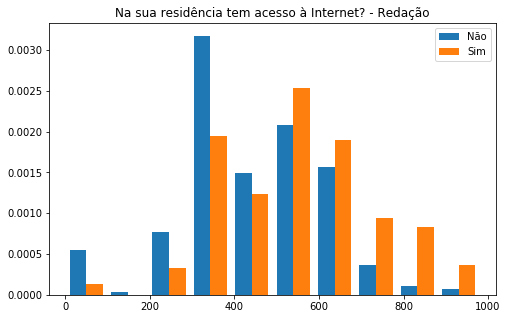

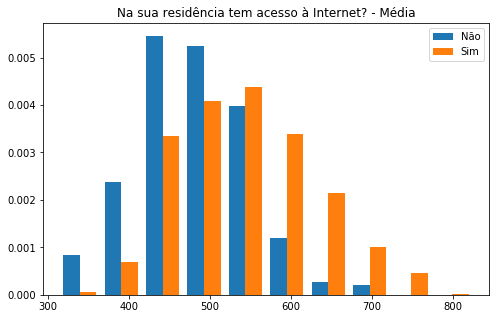

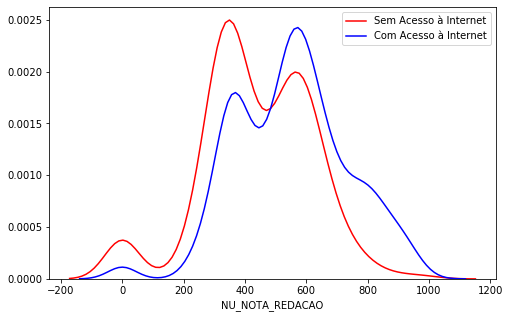

In [16]:
labels = ['Ciêncidas da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação', 'Média']
columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO', 'Media']
for i in range(len(dfs)):
    plt.hist([dfCorr[dfCorr['Q025'] == 1][columns[i]],dfCorr[dfCorr['Q025'] == 2][columns[i]]], label=['Não', 'Sim'], density=True)
    plt.legend(loc='upper right')
    plt.title('Na sua residência tem acesso à Internet? - '+labels[i])
    plt.show()
    
#Passar isso para o outro notebook?    
sns.distplot(dfCorr[dfCorr['Q025'] == 1]['NU_NOTA_REDACAO'], color = 'red', hist = False, label = 'Sem Acesso à Internet')
sns.distplot(dfCorr[dfCorr['Q025'] == 2]['NU_NOTA_REDACAO'], color = 'blue', hist = False, label = 'Com Acesso à Internet')
    


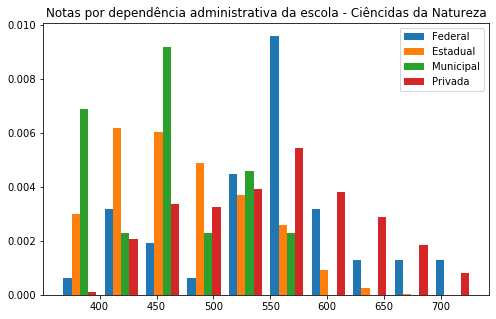

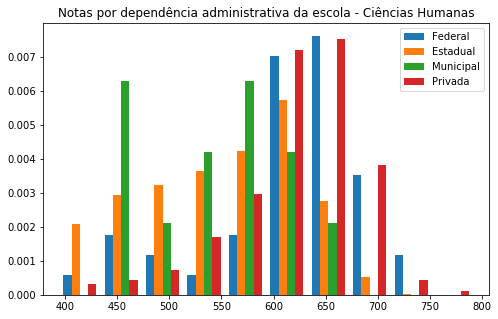

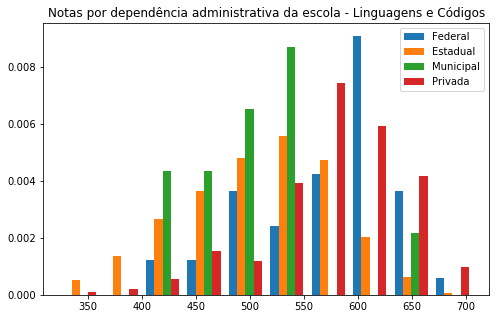

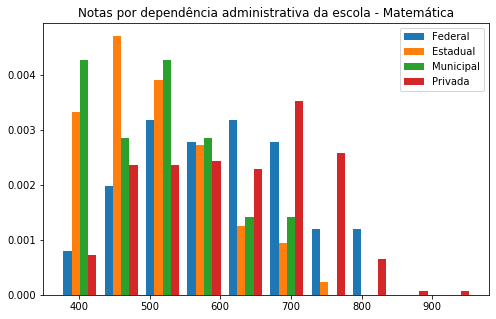

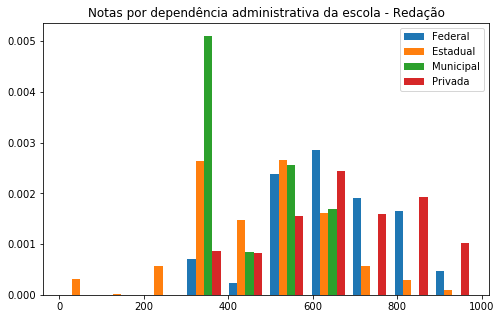

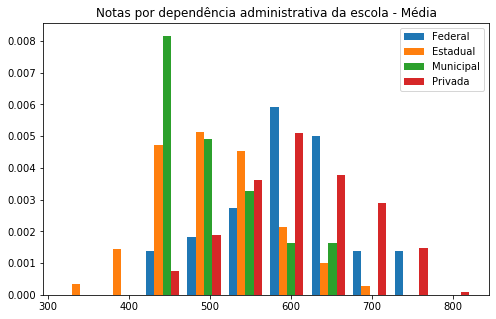

In [17]:
labels = ['Ciêncidas da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação', 'Média']
columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO', 'Media']
for i in range(len(dfs)):
    plt.hist([dfCorr[dfCorr['TP_DEPENDENCIA_ADM_ESC'] == 1][columns[i]],dfCorr[dfCorr['TP_DEPENDENCIA_ADM_ESC'] == 2][columns[i]], 
             dfCorr[dfCorr['TP_DEPENDENCIA_ADM_ESC'] == 3][columns[i]],dfCorr[dfCorr['TP_DEPENDENCIA_ADM_ESC'] == 4][columns[i]]],
             label=['Federal', 'Estadual', 'Municipal', 'Privada'], density=True)
    plt.legend(loc='upper right')
    plt.title('Notas por dependência administrativa da escola - '+labels[i])
    #plt.xlim(700, 1000)
    plt.show()
    


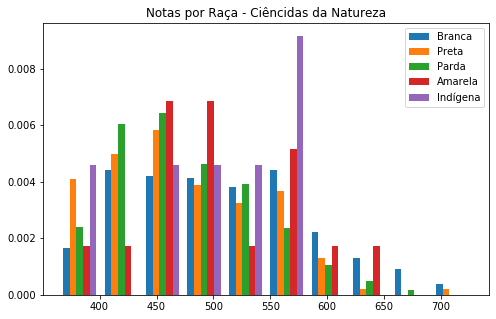

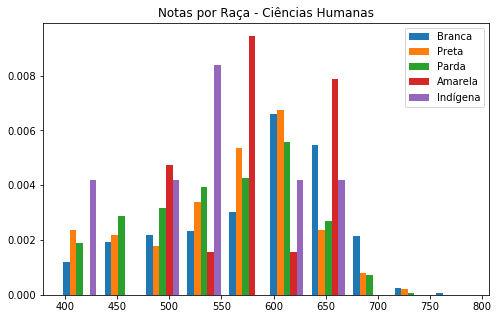

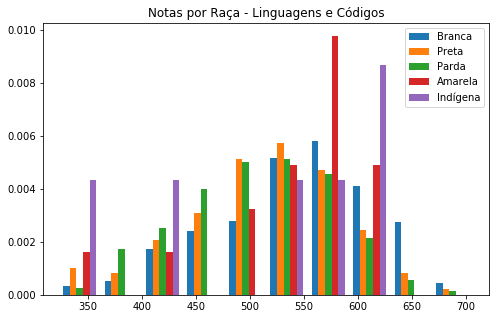

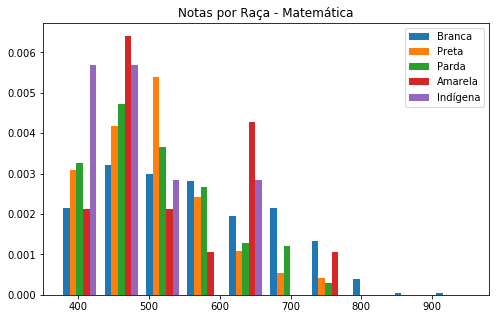

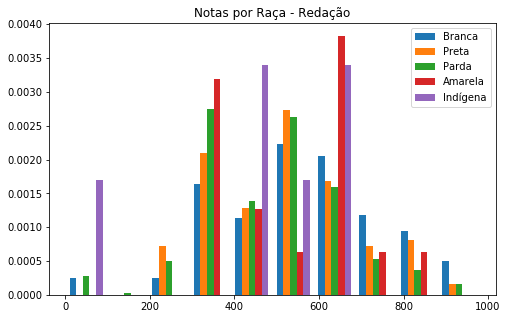

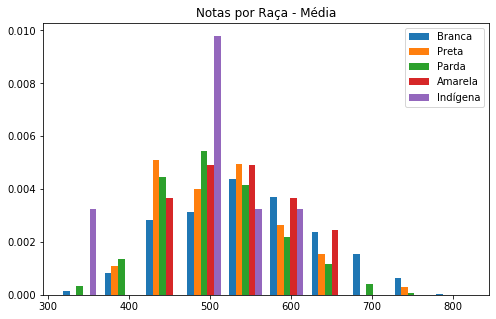

In [18]:
labels = ['Ciêncidas da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação', 'Média']
columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO', 'Media']
for i in range(len(dfs)):
    plt.hist([dfCorr[dfCorr['TP_COR_RACA'] == 1][columns[i]],dfCorr[dfCorr['TP_COR_RACA'] == 2][columns[i]],
             dfCorr[dfCorr['TP_COR_RACA'] == 3][columns[i]], dfCorr[dfCorr['TP_COR_RACA'] == 4][columns[i]], 
             dfCorr[dfCorr['TP_COR_RACA'] == 5][columns[i]]], label=['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'], density=True)
    plt.legend(loc='upper right')
    plt.title('Notas por Raça - '+ labels[i])
    plt.show()


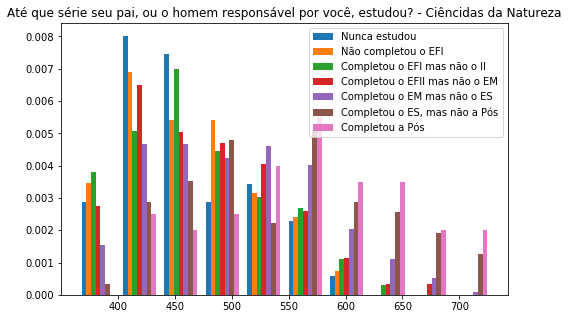

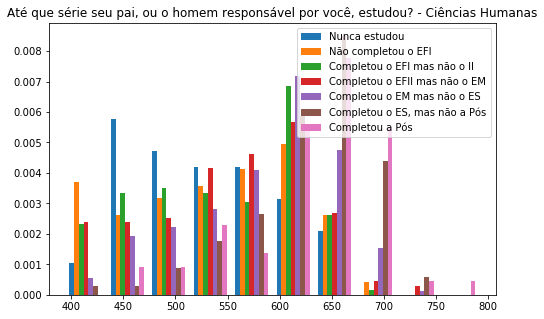

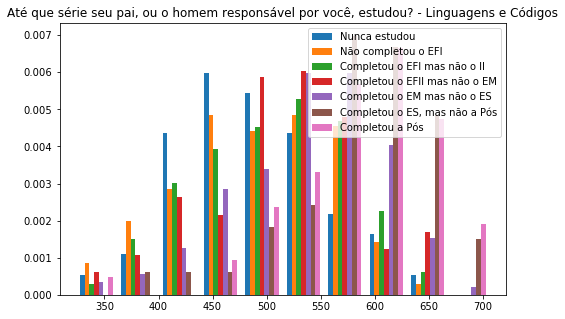

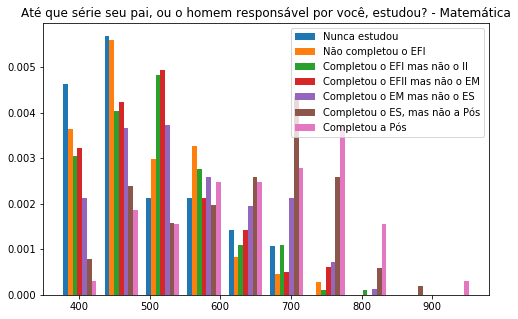

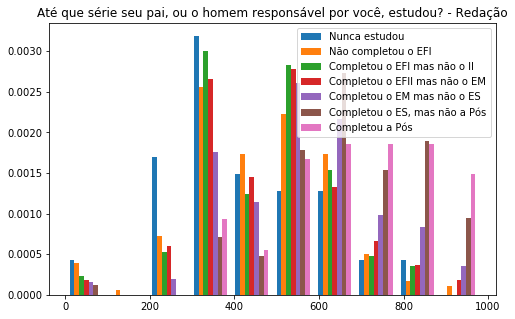

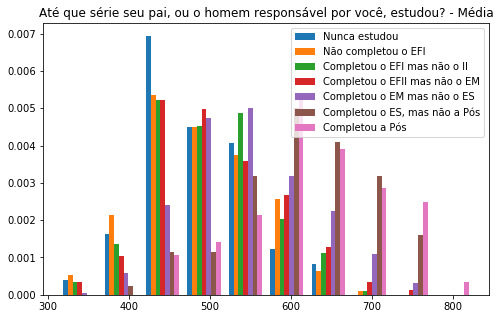

In [19]:
labels = ['Ciêncidas da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação', 'Média']
columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO', 'Media']
for i in range(len(dfs)):
    plt.hist([dfCorr[dfCorr['Q001'] == 1][columns[i]],dfCorr[dfCorr['Q001'] == 2][columns[i]],
             dfCorr[dfCorr['Q001'] == 3][columns[i]], dfCorr[dfCorr['Q001'] == 4][columns[i]], 
             dfCorr[dfCorr['Q001'] == 5][columns[i]], dfCorr[dfCorr['Q001'] == 6][columns[i]], 
             dfCorr[dfCorr['Q001'] == 7][columns[i]]], label=['Nunca estudou',  'Não completou o EFI',  'Completou o EFI mas não o II', 'Completou o EFII mas não o EM', 'Completou o EM mas não o ES', 'Completou o ES, mas não a Pós', 'Completou a Pós'], density=True)
    plt.legend(loc='upper right')
    plt.title('Até que série seu pai, ou o homem responsável por você, estudou? - '+ labels[i])
    plt.show()


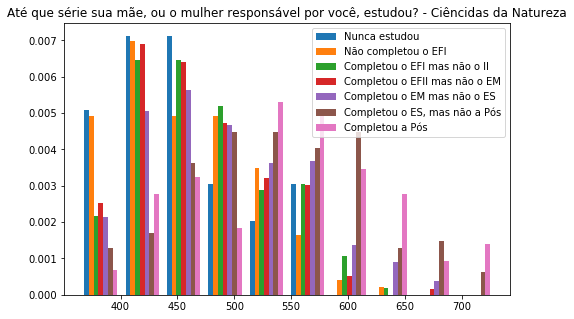

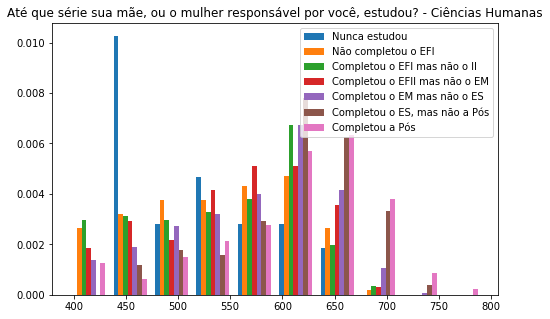

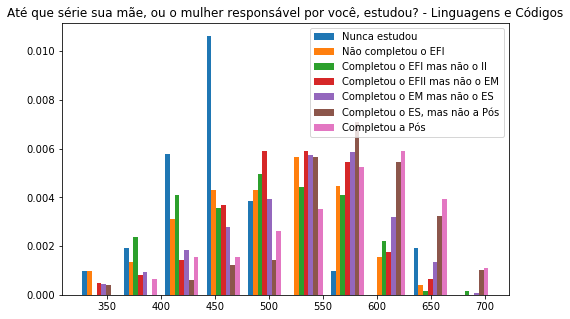

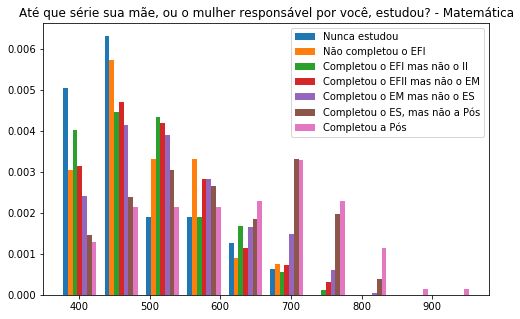

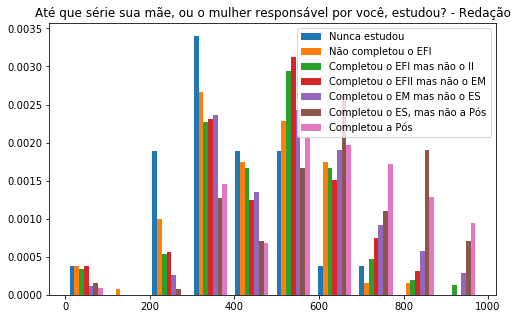

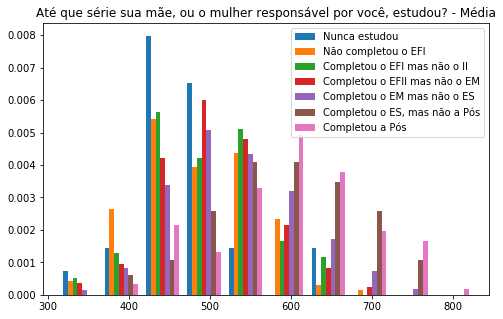

In [20]:
labels = ['Ciêncidas da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação', 'Média']
columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO', 'Media']
for i in range(len(dfs)):
    plt.hist([dfCorr[dfCorr['Q002'] == 1][columns[i]],dfCorr[dfCorr['Q002'] == 2][columns[i]],
             dfCorr[dfCorr['Q002'] == 3][columns[i]], dfCorr[dfCorr['Q002'] == 4][columns[i]], 
             dfCorr[dfCorr['Q002'] == 5][columns[i]], dfCorr[dfCorr['Q002'] == 6][columns[i]], 
             dfCorr[dfCorr['Q002'] == 7][columns[i]]], label=['Nunca estudou',  'Não completou o EFI',  'Completou o EFI mas não o II', 'Completou o EFII mas não o EM', 'Completou o EM mas não o ES', 'Completou o ES, mas não a Pós', 'Completou a Pós'], density=True)
    plt.legend(loc='upper right')
    plt.title('Até que série sua mãe, ou o mulher responsável por você, estudou? - '+ labels[i])
    plt.show()


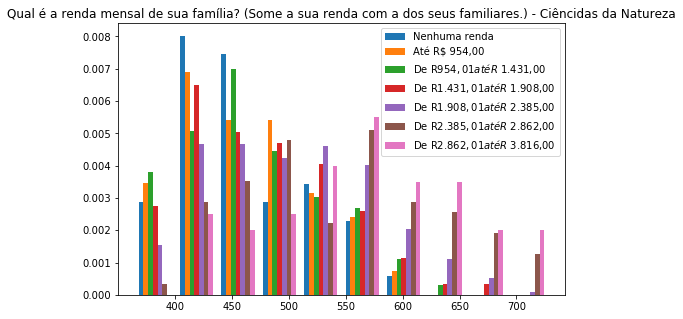

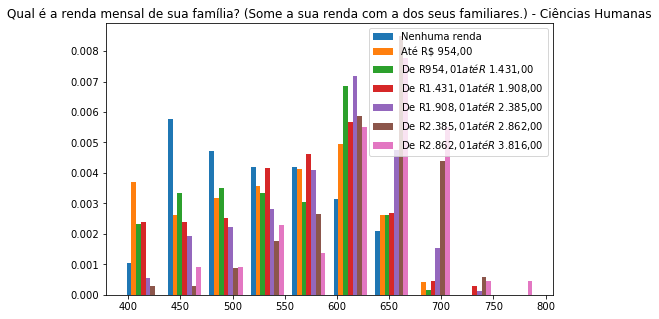

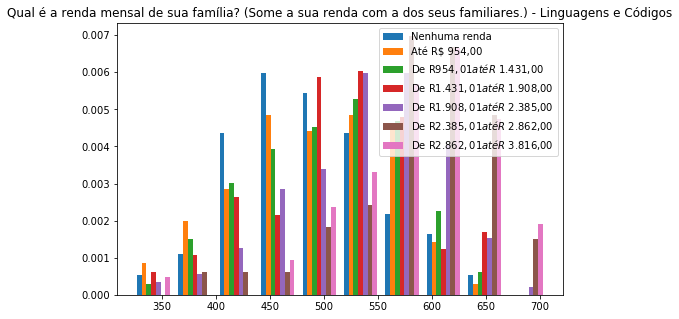

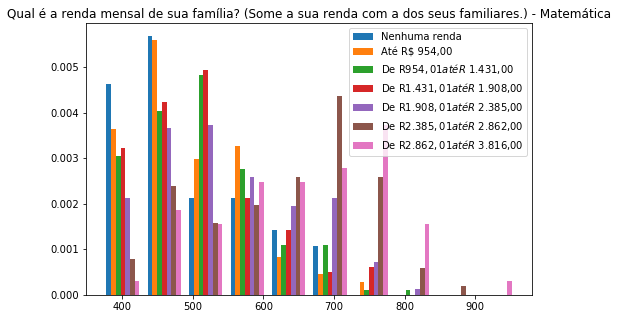

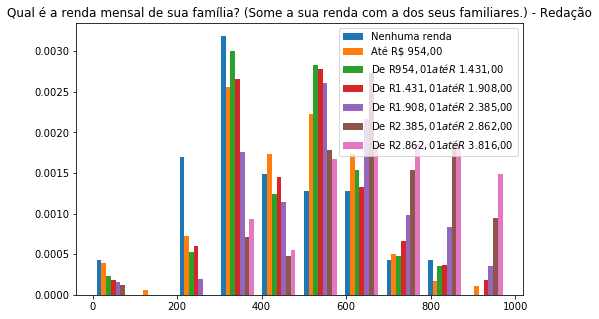

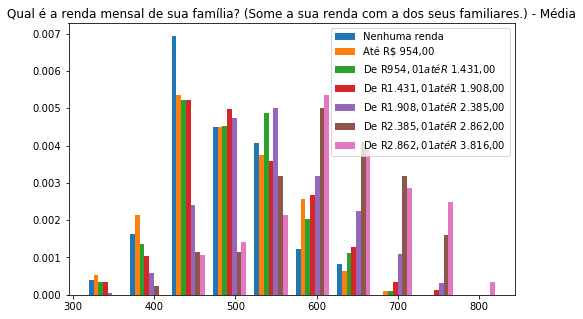

In [22]:
labels = ['Ciêncidas da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação', 'Média']
columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO', 'Media']
for i in range(len(dfs)):
    plt.hist([dfCorr[dfCorr['Q001'] == 1][columns[i]],dfCorr[dfCorr['Q001'] == 2][columns[i]],
             dfCorr[dfCorr['Q001'] == 3][columns[i]], dfCorr[dfCorr['Q001'] == 4][columns[i]], 
             dfCorr[dfCorr['Q001'] == 5][columns[i]], dfCorr[dfCorr['Q001'] == 6][columns[i]], 
             dfCorr[dfCorr['Q001'] == 7][columns[i]]], label=['Nenhuma renda', 'Até R$ 954,00', 'De R$ 954,01 até R$ 1.431,00', 'De R$ 1.431,01 até R$ 1.908,00', 'De R$ 1.908,01 até R$ 2.385,00', 'De R$ 2.385,01 até R$ 2.862,00', 'De R$ 2.862,01 até R$ 3.816,00', 'De R$ 3.816,01 até R$ 4.770,00', 'De R$ 4.770,01 até R$ 5.724,00', 'De R$ 5.724,01 até R$ 6.678,00', 'De R$ 6.678,01 até R$ 7.632,00', 'De R$ 7.632,01 até R$ 8.586,00', 'De R$ 8.586,01 até R$ 9.540,00', 'De R$ 9.540,01 até R$ 11.448,00', 'De R$ 11.448,01 até R$ 14.310,00', 'De R$ 14.310,01 até R$ 19.080,00', 'Mais de R$ 19.080,00'], density=True)
    plt.legend(loc='upper right')
    plt.title('Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.) - '+ labels[i])
    plt.show()
